# Building recommendation System
   ## User based Collaboration filtering
   - ### Eucledian Distance
   - ### Pearson Correlation 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Creating the simple movie data

movie_user_preferences = {
'Jill': {'Avenger: Age of Ultron': 7.0,
 'Django Unchained': 6.5,
 'Gone Girl': 9.0,
 'Kill the Messenger': 8.0},
    
'Julia': {'Avenger: Age of Ultron': 10.0,
 'Django Unchained': 6.0,
 'Gone Girl': 6.5,
 'Kill the Messenger': 6.0,
 'Zoolander': 6.5},
    
'Max': {'Avenger: Age of Ultron': 7.0,
 'Django Unchained': 7.0,
 'Gone Girl': 10.0,
 'Horrible Bosses 2': 6.0,
 'Kill the Messenger': 5.0,
 'Zoolander': 10.0},
    
'Robert': {'Avenger: Age of Ultron': 8.0,
 'Django Unchained': 7.0,
 'Horrible Bosses 2': 5.0,
 'Kill the Messenger': 9.0,
 'Zoolander': 9.0},
    
'Sam': {'Avenger: Age of Ultron': 10.0,
 'Django Unchained': 7.5,
 'Gone Girl': 6.0,
 'Horrible Bosses 2': 3.0,
 'Kill the Messenger': 5.5,
 'Zoolander': 7.0},
    
'Toby': {'Avenger: Age of Ultron': 8.5,
 'Django Unchained': 9.0,
 'Zoolander': 2.0},
    
'William': {'Avenger: Age of Ultron': 6.0,
 'Django Unchained': 8.0,
 'Gone Girl': 7.0,
 'Horrible Bosses 2': 4.0,
 'Kill the Messenger': 6.5,
 'Zoolander': 4.0
}
}

In [8]:
#Checking what William rated Gone Girl

William = movie_user_preferences['William']['Gone Girl']

#Checking what Toby rated Zoolander
Toby = movie_user_preferences['Toby']['Zoolander']

print('Ratings: ', William)
print('Ratings: ', Toby)

Ratings:  7.0
Ratings:  2.0



## Eucledian Distance

In [9]:
# So here we will create a dataframe that contain the users who have watched Zoolander and Django Unchained

data = []

for i in movie_user_preferences.keys():
    try:
        data.append((i,
                     movie_user_preferences[i]['Zoolander'],
                     movie_user_preferences[i]['Django Unchained']
                    ))
    except:
        pass
    
    

In [12]:
df = pd.DataFrame(data = data, 
                 columns = ['User', 'Zoolander', 'Django'])
df.head()

,User,Zoolander,Django
0,Julia,6.5,6.0
1,Max,10.0,7.0
2,Robert,9.0,7.0
3,Sam,7.0,7.5
4,Toby,2.0,9.0


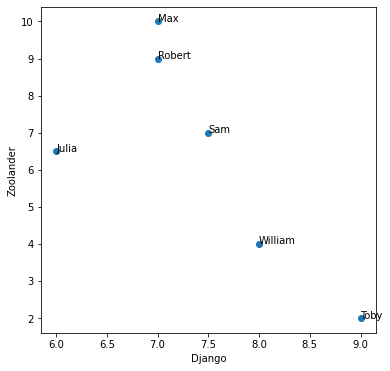

In [23]:
# We will plot different Users with Django as the y axis and Zoolander as the x axis

plt.figure(figsize = (6, 6))
plt.scatter(df.Django, df.Zoolander)
plt.xlabel('Django')
plt.ylabel('Zoolander')
for i, txt in enumerate(df.User):
    plt.annotate(txt, (df.Django[i], df.Zoolander[i]))
plt.show()


In [26]:
# We can notice that Max and Toby are far away while Max and Robert are close so we shall calculate the Eucledian distance between them

#Eucledian Distance between Max and Toby
Max_Toby = math.sqrt(pow(10 - 2, 2) + pow(7 - 9, 2))
print('Distance between Max and Toby: ', Max_Toby)

#Eucledian Distance between Max and Robert
Max_Rob = math.sqrt(pow(10 - 9, 2) + pow(7 - 7, 2))
print('Distance between Max and Toby: ', Max_Rob)


Distance between Max and Toby:  8.246211251235321
Distance between Max and Toby:  1.0


We can see that the further the users are away from each other, the higher the Euclidean distance.

In [28]:
#Next we shall get the simillarity distance by dividing the Eucledean distance by 1 and 
#We'll also add 1 in the denominator to avoid getting ZeroDivisionError.

#Similarity score based on the Eucledian distance between Max and Toby
Sim_Max_Toby = 1 / (1 + Max_Toby)

print("Similarity Score between Max and Toby: ", Sim_Max_Toby)

#Similarity score based on the Eucledian distance between Max and Robert
Sim_Max_Rob = 1 / (1 + Max_Rob)
print("Similarity Score between Max and Rob: ", Sim_Max_Rob)


Similarity Score between Max and Toby:  0.10815240673485554
Similarity Score between Max and Rob:  0.5


In [35]:
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs, person1, person2):
    #  Get the list of shared_items
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item] = 1
    # if they have no ratings in common, return 0
    if len(si) == 0:
        return 0
    
     # Add up the squares of all the differences
    sum_of_squares = sum([pow(prefs[person1][item] - 
                        prefs[person2][item],2)
                          
    for item in prefs[person1] if item in prefs[person2]])
    
    return 1/(1+sum_of_squares)

In [36]:
# Let's apply the preceding function to calculate the similarity score between Sam and Toby:
sim_distance(movie_user_preferences,'Sam','Toby')

0.03278688524590164

## Person Correlation

In [65]:


def create_movie_user_df(input_data, user1, user2):
    data = []
    for movie in input_data[user1].keys():
        if movie in input_data[user2].keys():
            try:
                data.append((movie,
                            input_data[user1][movie],
                            input_data[user2][movie]))
            except:
                pass
    return pd.DataFrame(data = data, columns = ['movie', user1, user2])

In [66]:
df = create_movie_user_df(movie_user_preferences, 'Sam', 'William')
df.head()

,movie,Sam,William
0,Avenger: Age of Ultron,10.0,6.0
1,Django Unchained,7.5,8.0
2,Gone Girl,6.0,7.0
3,Horrible Bosses 2,3.0,4.0
4,Kill the Messenger,5.5,6.5


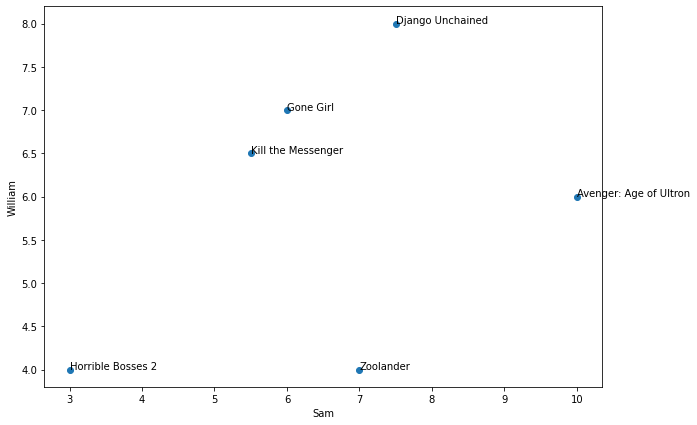

In [70]:
#Scatter plot 

plt.figure(figsize = (10, 7))
plt.scatter(df.Sam, df.William)
plt.xlabel('Sam')
plt.ylabel('William')
for i, txt in enumerate (df.movie):
    plt.annotate(txt, (df.Sam[i], df.William[i]))
plt.show()


In [78]:
from scipy import stats
stats.pearsonr(df.Sam, df.William)

(0.3706740197017842, 0.4694541326841095)

In [85]:
# Creating a function that takes in the data and calculates the Pearson correlation between the two users
def sim_corr(prefs, p1, p2):
    si = {}
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item] = 1
    
    #Find the number of elements
    n = len(si)
    
    #if there are no ratings in common, return 0
    if n==0:
        return 0
    # Add up all the preferences
    sum1 = sum([prefs[p1][it] for it in si])
    sum2 = sum([prefs[p2][it] for it in si])
    
    #sum up the squares
    sum1sq = sum([pow(prefs[p1][it], 2) for it in si])
    sum2sq = sum([pow(prefs[p2][it], 2) for it in si])
    
    #sum up the products
    psum = sum([prefs[p1][it]*prefs[p2][it] for it in si])
    
    #Calculate Person score
    num = psum - (sum1*sum2/n)
    den = math.sqrt((sum1sq - pow(sum1, 2)/n) * (sum2sq - pow(sum2, 2)/n))
    if den == 0:
        return 0
    
    r = num/den
    
    return r

In [86]:
sim_corr(movie_user_preferences,'Sam','Julia')

0.8828518332602507

In [87]:

def top_matches(prefs, person, n=5, similarity = sim_corr):
    scores = [(similarity(prefs, person, other), other)
             for other in prefs if other != person]
    
    #sort the list so the highest scores appear at the top
    scores.sort()
    scores.reverse()
    
    return scores[0:n]

In [91]:
# Let's see the top three people who are similar to Toby
top_matches(movie_user_preferences,'Toby', 
 n = 3, similarity = sim_distance)

[(0.10526315789473684, 'Jill'),
 (0.08163265306122448, 'William'),
 (0.03278688524590164, 'Sam')]

In [102]:
# Gets recommendations for a person by using a weighted average of every other user's rankings
def get_recommendations(prefs, person, similarity=sim_corr):
    totals = {}
    simSums = {}
    
    for other in prefs:
        #Don't compare me to myself
        if other == person:
            continue
        sim = similarity(prefs, person, other)
        
        #ignore scores of zero or lower
        if sim <= 0:
            continue
        for item in prefs[other]:
            
            #only score movies I have not seen yet
            if item not in prefs[person] or prefs[person][item] == 0:
                #similarity * score
                totals.setdefault(item, 0)
                totals[item] += prefs[other][item]*sim
                # Sum of similarities
                simSums.setdefault(item, 0)
                simSums[item] += sim
                
    # Create the normalized list
    rankings = [(total/simSums[item], item) for item, total in 
               totals.items()]
    
    # Return the sorted list
    rankings.sort()
    rankings.reverse()
    return rankings
     

In [113]:
# Using correlation to make recommendations for Jill
get_recommendations(movie_user_preferences, 'Jill')

[(9.333886079952519, 'Zoolander'), (5.333886079952517, 'Horrible Bosses 2')]

In [114]:
#Using Eucledian similarity scores for Jill
get_recommendations(movie_user_preferences, 'Jill', similarity = sim_distance)

[(7.0667160136215905, 'Zoolander'), (4.844239631336406, 'Horrible Bosses 2')]